<a href="https://colab.research.google.com/github/SARMAD-ALI-cyber/U_Net_Architecture/blob/main/U_Net_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d girish17019/mobile-phone-defect-segmentation-dataset

 99% 1.59G/1.61G [00:16<00:00, 81.1MB/s]
100% 1.61G/1.61G [00:16<00:00, 102MB/s] 


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/mobile-phone-defect-segmentation-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate

#from test_utils import summary, comparator

In [5]:
from PIL import Image
import os

# Define the path to your dataset images directory
image_path = '/content/oil'

# Create a new directory to save the converted images (if needed)
converted_image_path = '/content/OIL'
if not os.path.exists(converted_image_path):
    os.makedirs(converted_image_path)

# Get the list of filenames for images in the image directory
image_list = os.listdir(image_path)

# Loop through each image file, convert to PNG, and save to the new directory
for image_filename in image_list:
    if image_filename.endswith('.jpg'):
        image = Image.open(os.path.join(image_path, image_filename))
        # Convert the image to RGBA mode to preserve transparency if any
        image = image.convert('RGBA')
        png_filename = os.path.splitext(image_filename)[0] + '.png'
        image.save(os.path.join(converted_image_path, png_filename), format='PNG')


In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import imageio

import matplotlib.pyplot as plt
%matplotlib inline

path = ''
image_path = os.path.join(path, '/content/OIL/')
mask_path = os.path.join(path, '/content/ground_truth_2/')
image_list_orig = os.listdir(image_path)
image_list = [image_path+i for i in image_list_orig]
mask_list = [mask_path+i for i in image_list_orig]

In [ ]:
image_list_orig[0]

'Oil_0022.png'

<ipython-input-11-36d200e3366e>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_list[N])
<ipython-input-11-36d200e3366e>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_list[N])


Text(0.5, 1.0, 'Segmentation')

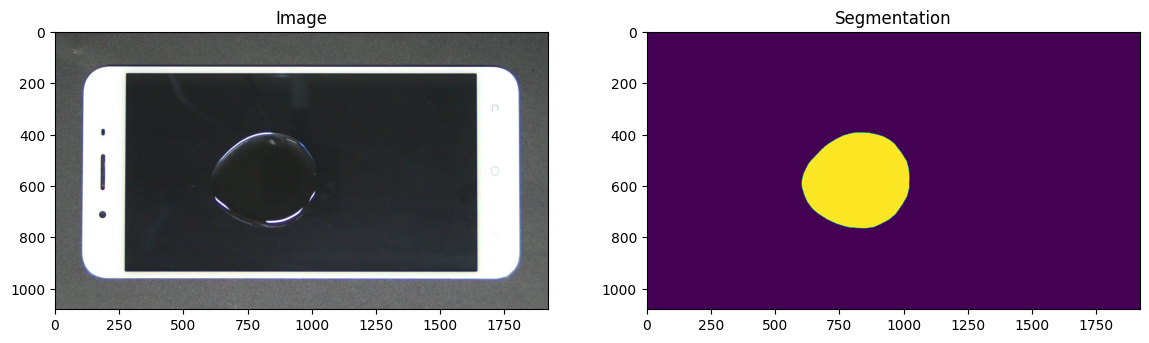

In [ ]:
N = 47
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask[:, :, 0])
arr[1].set_title('Segmentation')

In [ ]:
image_list_ds = tf.data.Dataset.list_files(image_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(mask_list, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/OIL/Oil_0001.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/ground_truth_2/Oil_0001.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/OIL/Oil_0002.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/ground_truth_2/Oil_0002.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/OIL/Oil_0003.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/ground_truth_2/Oil_0003.png'>)


# **Explanation For dataset variable:**
This explanation is about: tf.data.Dataset.from_tensor_slices
'tf.data.Dataset.from_tensor_slices is a function provided by TensorFlow's Dataset API, used to create a dataset from one or more tensors. The function is useful when you have data stored in tensors, and you want to convert them into a dataset to efficiently work with large-scale data and apply various transformations during data processing.

Here's a clear explanation of tf.data.Dataset.from_tensor_slices:

Input: The function takes one or more tensors as input. A tensor is a multi-dimensional array-like data structure used in TensorFlow to represent data.

Output: It returns a dataset object that contains individual elements from the input tensors. Each element of the dataset represents a single entry of the corresponding tensors.

How it works: The function slices the input tensors along the first dimension (axis 0) and creates a dataset where each element corresponds to a slice from the input tensors. It ensures that corresponding elements from different input tensors (if multiple tensors are provided) are paired together in the dataset.

Example: Suppose you have two tensors A and B:
A = [1, 2, 3, 4]
B = ['a', 'b', 'c', 'd']
If you use tf.data.Dataset.from_tensor_slices((A, B)), it will create a dataset like this:
[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]
Each element in the dataset is a tuple of two values, where the first value comes from tensor A, and the second value comes from tensor B. The elements in the dataset are paired together based on their corresponding positions in the input tensors.

Usage: This function is commonly used to work with machine learning datasets, where you have features and labels stored in separate tensors, and you want to create a dataset that pairs each feature with its corresponding label.

Overall, tf.data.Dataset.from_tensor_slices is a powerful and convenient way to create datasets from tensors, making it easier to process and transform data for training machine learning models efficiently.


In [ ]:
image_filenames = tf.constant(image_list)
masks_filenames = tf.constant(mask_list)

dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'/content/OIL/Oil_0022.png', shape=(), dtype=string)
tf.Tensor(b'/content/ground_truth_2/Oil_0022.png', shape=(), dtype=string)


In [ ]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (96, 128), method='nearest')
    input_mask = tf.image.resize(mask, (96, 128), method='nearest')

    return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

In [ ]:
def encoder_block(input_shape=None,num_filters=32,max_pooling=True,dropout_prob=0):
  X=tf.keras.layers.Conv2D(filters=num_filters,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal')(input_shape)
  X=tf.keras.layers.Conv2D(filters=num_filters,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal')(X)

  if dropout_prob>0:
    X=tf.keras.layers.Dropout(dropout_prob)(X)


  if max_pooling:
    new_block=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(X)
  else:
    new_block=X
  skip_connection=X

  return new_block,skip_connection

In [ ]:
def decoder_block(fifth_block,fourth_block_skip_con,num_filters=32):
  upper=tf.keras.layers.Conv2DTranspose(filters=num_filters,kernel_size=(3,3),padding='same',strides=(2,2))(fifth_block)

  connect=concatenate([upper,fourth_block_skip_con],axis=3)

  X=tf.keras.layers.Conv2D(filters=num_filters,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal')(connect)
  X=tf.keras.layers.Conv2D(filters=num_filters,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal')(X)

  return X


In [ ]:
def segmentation(input_shape=(96,128,3),num_filters=32):
  input_shape = Input(input_shape)
  #==================Encoder Block=========================
  encoder_block1=encoder_block(input_shape,num_filters)
  encoder_block2=encoder_block(encoder_block1[0],num_filters*2)
  encoder_block3=encoder_block(encoder_block2[0],num_filters*4)
  encoder_block4=encoder_block(encoder_block3[0],num_filters*8,dropout_prob=0.3)
  encoder_block5=encoder_block(encoder_block4[0],num_filters*16,max_pooling=False,dropout_prob=0.3)
  #===================Decoder Block========================
  decoder_block1=decoder_block(encoder_block5[0],encoder_block4[1],num_filters*8)
  decoder_block2=decoder_block(decoder_block1,encoder_block3[1],num_filters*4)
  decoder_block3=decoder_block(decoder_block2,encoder_block2[1],num_filters*2)
  decoder_block4=decoder_block(decoder_block3,encoder_block1[1],num_filters)
  #===================Convolution On Final Block===========
  conv1=tf.keras.layers.Conv2D(filters=num_filters,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal')(decoder_block4)
  conv2=tf.keras.layers.Conv2D(filters=129,kernel_size=(1,1),padding='same')(conv1)

  model=tf.keras.Model(inputs=input_shape,outputs=conv2)

  return model



In [ ]:
img_height = 96
img_width = 128
num_channels = 3

unet = segmentation((img_height, img_width, num_channels))

In [ ]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 128, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 96, 128, 32)  896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 96, 128, 32)  9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 48, 64, 32)   0           ['conv2d_1[0][0]']           

In [ ]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
EPOCHS = 5
VAL_SUBSPLITS = 5
BUFFER_SIZE = 500
BATCH_SIZE = 32
train_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(processed_image_ds.element_spec)
model_history = unet.fit(train_dataset, epochs=EPOCHS)

(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
Epoch 1/5
13/13 [==============================] - 59s 432ms/step - loss: 3.2620 - accuracy: 0.5721
Epoch 2/5
13/13 [==============================] - 2s 174ms/step - loss: 0.3038 - accuracy: 0.9809
Epoch 3/5
13/13 [==============================] - 2s 175ms/step - loss: 0.1225 - accuracy: 0.9814
Epoch 4/5
13/13 [==============================] - 2s 176ms/step - loss: 0.0760 - accuracy: 0.9814
Epoch 5/5
13/13 [==============================] - 2s 176ms/step - loss: 0.0592 - accuracy: 0.9814


Below Is some display stuff which i did'nt know about


In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

(1080, 1920, 1)


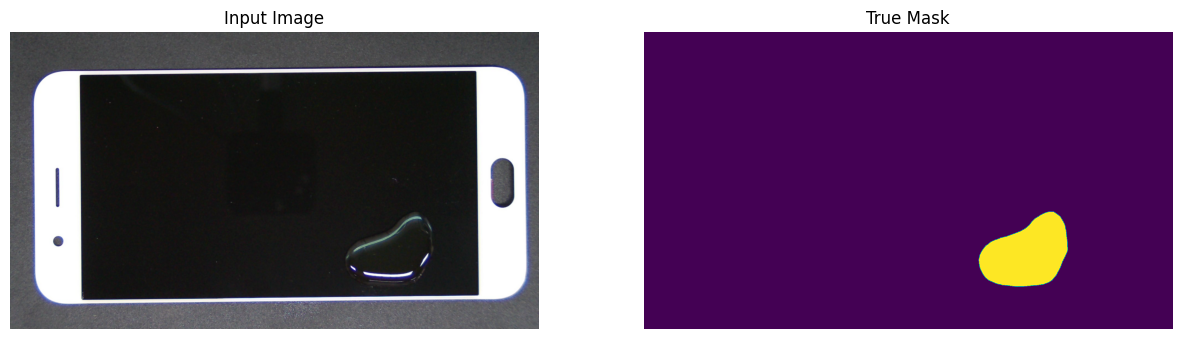

In [ ]:
for image, mask in image_ds.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

(96, 128, 1)


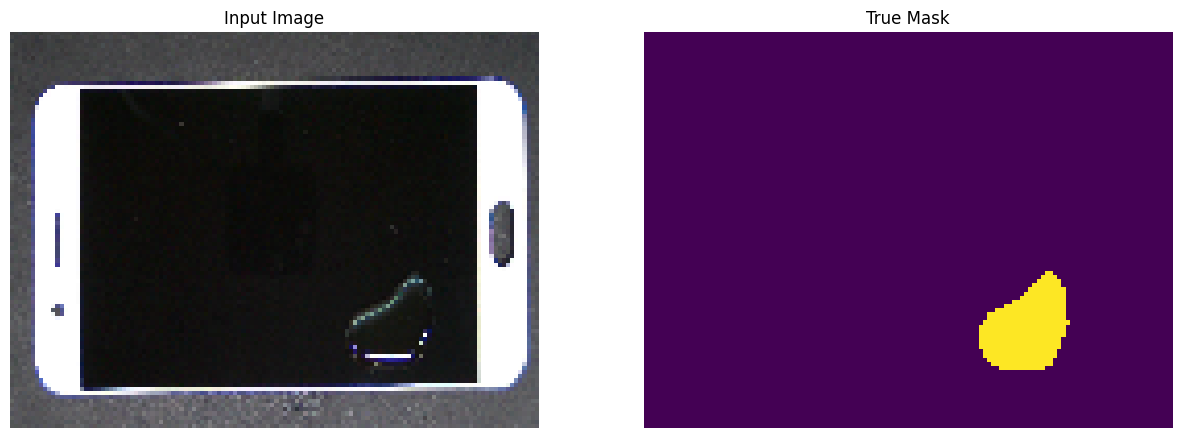

In [ ]:
for image, mask in processed_image_ds.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

From Here pridiction starts

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 0s 24ms/step


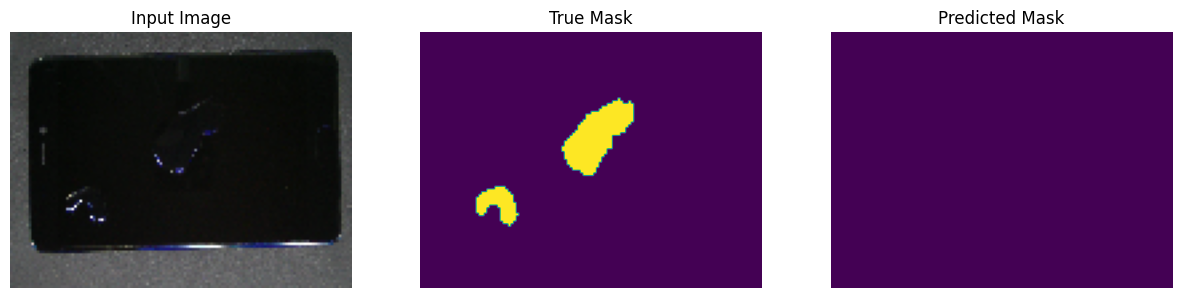

1/1 [==============================] - 0s 36ms/step


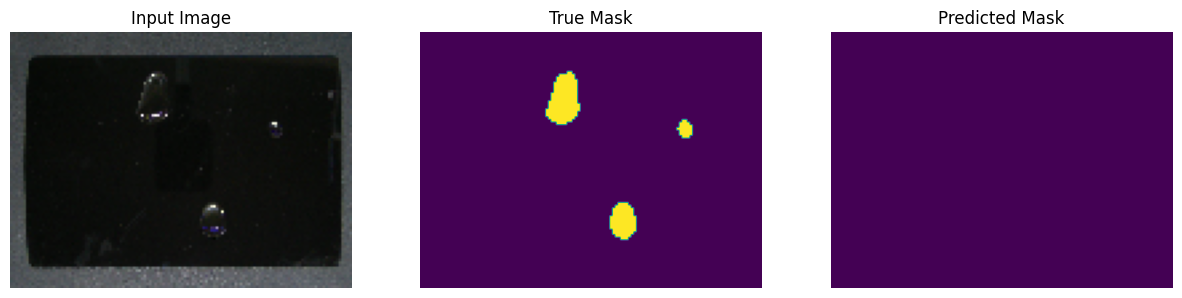

1/1 [==============================] - 0s 43ms/step


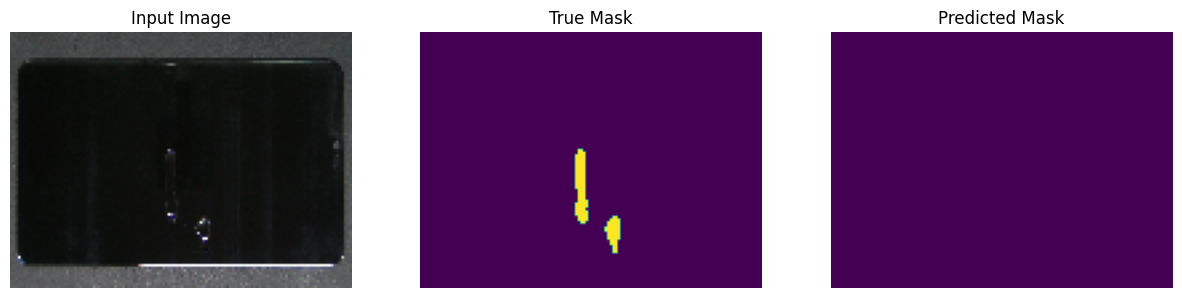

1/1 [==============================] - 0s 24ms/step


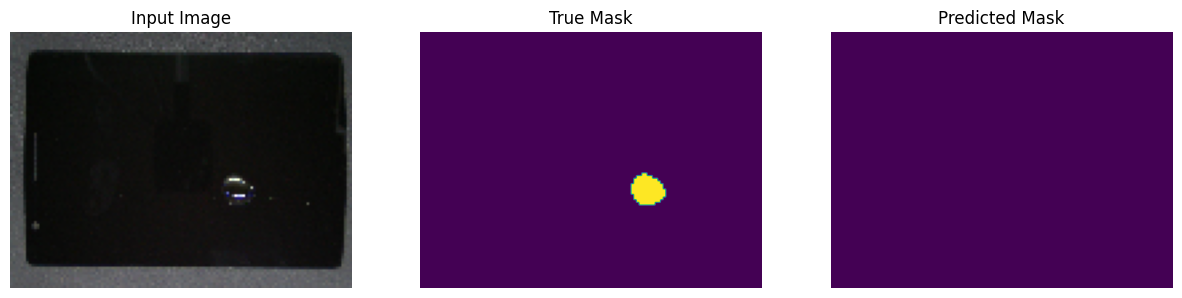

1/1 [==============================] - 0s 22ms/step


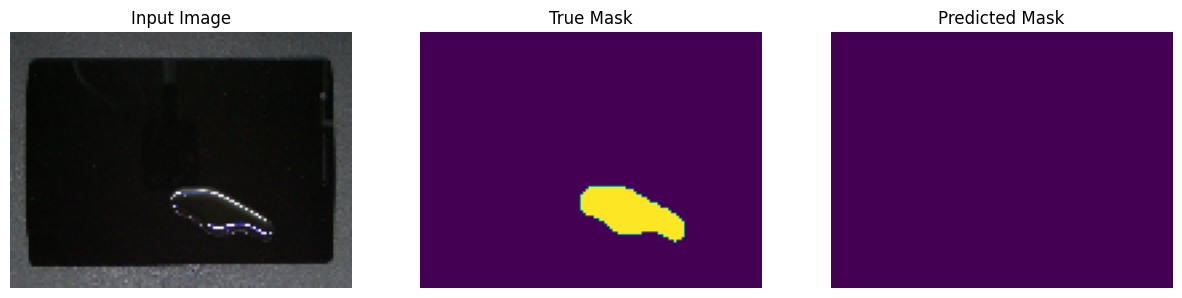

1/1 [==============================] - 0s 23ms/step


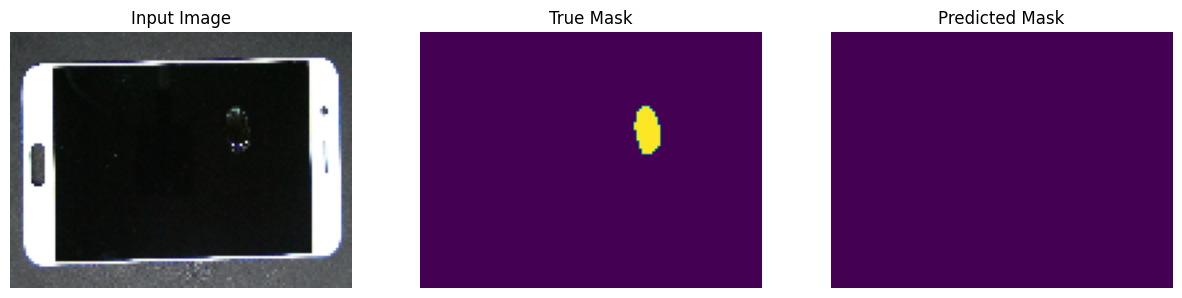

In [ ]:
show_predictions(train_dataset, 6)